In [1]:
# import pandas and numpy
import pandas as pd
import numpy

In [2]:
# path of nasa climate data
data_path = 'data/climate/nasa-ghgases-co2-mean.csv'
# read data with pandas
co2_data = pd.read_csv(data_path)

In [3]:
# list the top 7 rows
co2_data.head(7)

,year,co2_ppm_mean
0,1850,285.2
1,1851,285.1
2,1852,285.0
3,1853,285.0
4,1854,284.9
5,1855,285.1
6,1856,285.4


In [4]:
# select subset of dataframe based on index with iloc
co2_data.iloc[7:12]

,year,co2_ppm_mean
7,1857,285.6
8,1858,285.9
9,1859,286.1
10,1860,286.4
11,1861,286.6


In [5]:
# select columns in a different order and print head of dataframe
co2_data[['co2_ppm_mean', 'year']].head()

,co2_ppm_mean,year
0,285.2,1850
1,285.1,1851
2,285.0,1852
3,285.0,1853
4,284.9,1854


In [6]:
co2_data.plot(x='year', y='co2_ppm_mean');

In [7]:
# Add the decade column
co2_data['decade'] = co2_data['year'].round(-1)
co2_data.head()

,year,co2_ppm_mean,decade
0,1850,285.2,1850
1,1851,285.1,1850
2,1852,285.0,1850
3,1853,285.0,1850
4,1854,284.9,1850


In [8]:
# Group by decade
by_decade = co2_data[['decade', 'co2_ppm_mean']].groupby('decade').mean()
by_decade

,co2_ppm_mean
decade,
1850,285.040000
1860,286.236364
1870,287.733333
1880,290.790909
1890,294.377778
1900,295.981818
1910,300.066667
1920,303.427273
1930,307.533333


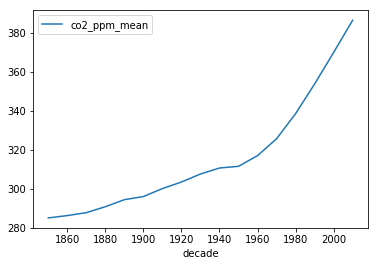

In [9]:
%matplotlib inline
by_decade.plot();

In [10]:
co2_data.columns

Index(['year', 'co2_ppm_mean', 'decade'], dtype='object')

In [11]:
# read gistemp 5 year mean 
# The GISS Surface Temperature Analysis (GISTEMP) is an estimate of global surface temperature change.
# explanation about gistemp: https://data.giss.nasa.gov/gistemp/ 
gistemp_data = pd.read_csv('data/climate/nasa-gistemp-5year-mean.csv')

In [12]:
gistemp_data.head()

,year,fiveyear_mean
0,1882,-0.48
1,1883,-0.48
2,1884,-0.52
3,1885,-0.58
4,1886,-0.60


In [13]:
# lets create a dataframe with co2 data and gistemp
df = pd.merge(co2_data[['year', 'co2_ppm_mean']], gistemp_data, on='year', how='outer')
df

,year,co2_ppm_mean,fiveyear_mean
0,1850,285.20,NaN
1,1851,285.10,NaN
2,1852,285.00,NaN
3,1853,285.00,NaN
4,1854,284.90,NaN
5,1855,285.10,NaN
6,1856,285.40,NaN
7,1857,285.60,NaN
8,1858,285.90,NaN
9,1859,286.10,NaN


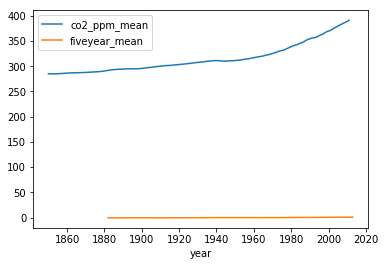

In [14]:
# lets plot it
df.plot(x='year')

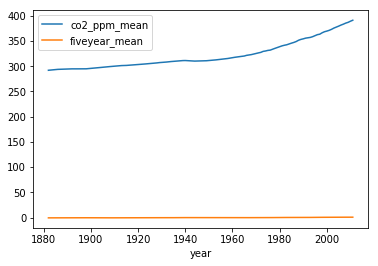

In [15]:
# we want to drop columns with nans
df = df.dropna()
df.plot(x='year')

In [16]:
# lets normalize co2_ppm_mean just to view it in the same graph
df['co2_ppm_normalized'] = (df.co2_ppm_mean - df.co2_ppm_mean.min()) / (df.co2_ppm_mean.max() - df.co2_ppm_mean.min())

/home/daniel/envs/p35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


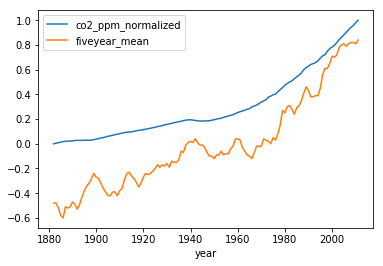

In [17]:
df[['year', 'co2_ppm_normalized', 'fiveyear_mean']].plot(x='year')

In [18]:
df.corr()

,year,co2_ppm_mean,fiveyear_mean,co2_ppm_normalized
year,1.000000,0.927103,0.936517,0.927103
co2_ppm_mean,0.927103,1.000000,0.976197,1.000000
fiveyear_mean,0.936517,0.976197,1.000000,0.976197
co2_ppm_normalized,0.927103,1.000000,0.976197,1.000000
